# Exploratory Data Analysis (EDA) Tutorial

## What is EDA?

Exploratory Data Analysis (EDA) is the critical first step in any data science project. It's the process of investigating datasets to discover patterns, spot anomalies, test hypotheses, and check assumptions using summary statistics and graphical representations.

EDA helps you:
- Understand the structure and content of your data
- Identify data quality issues (missing values, outliers, errors)
- Discover relationships between variables
- Formulate hypotheses for modeling
- Make informed decisions about preprocessing and feature engineering

## The EDA Workflow

Here's a systematic approach to EDA:

* Read in data
* Figure out what it is
* Pre-process it
* Look at dimensions
* Look at values
* Hunt for messed up values
* Hunt for NAs
* Plot it

Let's apply this workflow to two classic datasets: Iris (classification) and Titanic (survival analysis)!

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Set visualization defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# Part 1: Iris Dataset EDA

The Iris dataset is a classic dataset in machine learning, containing measurements of 150 iris flowers from three different species. It's perfect for learning classification and EDA techniques.

Features:

- **sepal_length**: Length of the sepal in cm

- **sepal_width**: Width of the sepal in cm

- **petal_length**: Length of the petal in cm

- **petal_width**: Width of the petal in cm

- **species**: Species of iris (setosa, versicolor, virginica) - TARGET variable

![alt text](iris.png)

## 1. Read in data

In [4]:
# Load the Iris dataset from seaborn's built-in datasets
iris = sns.load_dataset('iris')
print(f"Data loaded: {iris.shape[0]} rows, {iris.shape[1]} columns")

Data loaded: 150 rows, 5 columns


## 2. Figure out what it is

In [5]:
# First look at the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
# Get column information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 3. Pre-process it

We will convert the species strings into numerical categories:

In [7]:
# Convert species column to numeric values
species_mapping = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df_iris = iris.copy()
df_iris['species_encoded'] = df_iris['species'].map(species_mapping)

## 4. Look at dimensions

In [8]:
print(f"Dataset shape: {df_iris.shape}")
print(f"Total samples: {df_iris.shape[0]}")
print(f"Total features: {df_iris.shape[1]}")
print(f"\nMemory usage: {df_iris.memory_usage(deep=True).sum() / 1024:.2f} KB")

Dataset shape: (150, 6)
Total samples: 150
Total features: 6

Memory usage: 15.55 KB


## 5. Look at values

In [9]:
# Statistical summary for numeric columns
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_encoded
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 6. Hunt for messed up values

In [10]:
# Check for unusual values in numeric columns
print("Checking for unusual values...\n")

# Check each measurement for negative values
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    print(f"{col}:")
    print(f"  Min: {df_iris[col].min():.2f}, Max: {df_iris[col].max():.2f}")
    print(f"  Any negative values? {(df_iris[col] < 0).any()}")
    print()

Checking for unusual values...

sepal_length:
  Min: 4.30, Max: 7.90
  Any negative values? False

sepal_width:
  Min: 2.00, Max: 4.40
  Any negative values? False

petal_length:
  Min: 1.00, Max: 6.90
  Any negative values? False

petal_width:
  Min: 0.10, Max: 2.50
  Any negative values? False



### Outlier Detection with IQR Method

Let's use the Interquartile Range (IQR) method to detect outliers systematically.

In [11]:
# Outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("OUTLIER ANALYSIS (IQR Method):")
print("=" * 60)

numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df_iris, col)
    outlier_summary.append({
        'Feature': col,
        'Outliers': len(outliers),
        'Outlier %': f"{(len(outliers)/len(df_iris)*100):.1f}%",
        'Range': f"[{lower:.2f}, {upper:.2f}]"
    })
    if len(outliers) > 0:
        print(f"\n{col}:")
        print(f"  Outliers found: {len(outliers)}")
        print(f"  Valid range: {lower:.2f} to {upper:.2f}")
        print(f"  Outlier values: {outliers[col].values}")

outlier_df = pd.DataFrame(outlier_summary)
print("\n" + "=" * 60)
print("\nOUTLIER SUMMARY TABLE:")
print(outlier_df.to_string(index=False))

OUTLIER ANALYSIS (IQR Method):

sepal_width:
  Outliers found: 4
  Valid range: 2.05 to 4.05
  Outlier values: [4.4 4.1 4.2 2. ]


OUTLIER SUMMARY TABLE:
     Feature  Outliers Outlier %          Range
sepal_length         0      0.0%   [3.15, 8.35]
 sepal_width         4      2.7%   [2.05, 4.05]
petal_length         0      0.0% [-3.65, 10.35]
 petal_width         0      0.0%  [-1.95, 4.05]


### Distribution plots for all numeric features

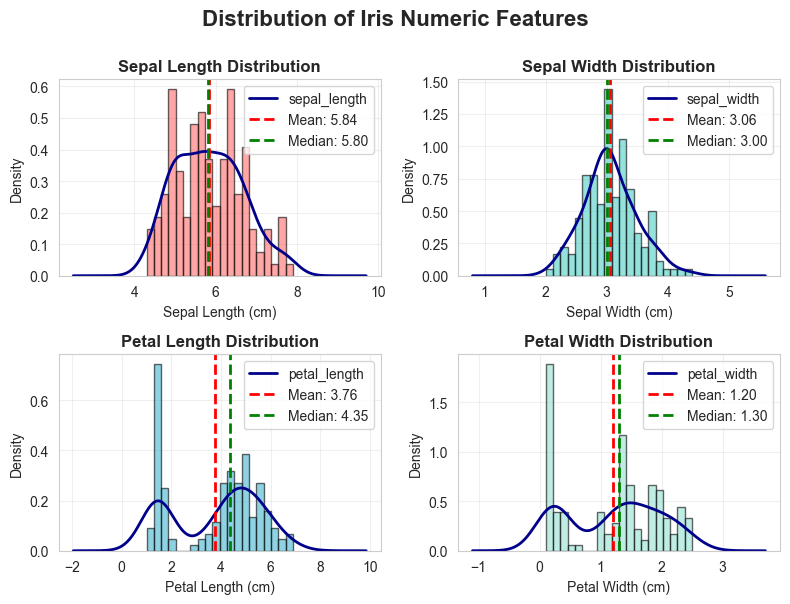

In [13]:

fig, axes = plt.subplots(2, 2, figsize=(8, 6))
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#95E1D3']

for idx, (col, color) in enumerate(zip(numeric_cols, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Histogram with KDE
    df_iris[col].hist(bins=20, ax=ax, alpha=0.6, color=color, edgecolor='black', density=True)
    df_iris[col].plot(kind='kde', ax=ax, color='darkblue', linewidth=2)
    
    # Add mean and median lines
    mean_val = df_iris[col].mean()
    median_val = df_iris[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    
    ax.set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold', fontsize=12)
    ax.set_ylabel('Density')
    ax.legend(loc='upper right')
    ax.set_xlabel(f'{col.replace("_", " ").title()} (cm)')
    ax.grid(alpha=0.3)

plt.suptitle('Distribution of Iris Numeric Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

### Is the dataset balanced?

In [14]:
# Check species distribution
print("Species distribution:")
print(df_iris['species'].value_counts())
print(f"\nBalanced dataset? {df_iris['species'].value_counts().std() < 1}")

Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Balanced dataset? True


## 7. Hunt for NAs

The Iris dataset is known for being clean, but let's verify.

In [15]:
# Missing values summary
missing = pd.DataFrame({
    'Missing_Count': df_iris.isnull().sum(),
    'Missing_Percent': (df_iris.isnull().sum() / len(df_iris) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Data Summary:")
print(missing[missing['Missing_Count'] > 0])

if missing['Missing_Count'].sum() == 0:
    print("\nGreat news! No missing values in the Iris dataset.")

Missing Data Summary:
Empty DataFrame
Columns: [Missing_Count, Missing_Percent]
Index: []

Great news! No missing values in the Iris dataset.


In [16]:
# Visualize missing data (if any)
if missing['Missing_Count'].sum() > 0:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Missing data bar chart
    missing_viz = missing[missing['Missing_Count'] > 0]
    axes[0].bar(missing_viz.index, missing_viz['Missing_Percent'], color='coral')
    axes[0].set_ylabel('Missing Percentage (%)')
    axes[0].set_title('Missing Data by Column')
    axes[0].grid(axis='y', alpha=0.3)
    axes[0].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing data to visualize - the Iris dataset is complete!")

No missing data to visualize - the Iris dataset is complete!


**Key Observations:**
- **No missing values**: The Iris dataset is complete and clean
- **Perfectly balanced**: Each species has exactly 50 samples

## 8. Plot it

### Species Distribution

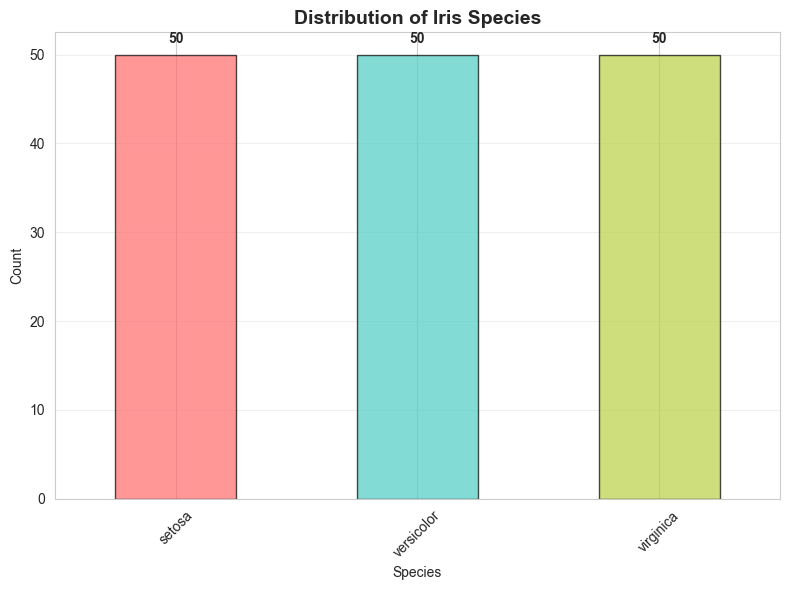

Species counts:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [17]:
# Species distribution
fig, ax = plt.subplots(figsize=(8, 6))

species_counts = df_iris['species'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', "#BAD145"]
species_counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black', alpha=0.7)
ax.set_title('Distribution of Iris Species', fontsize=14, fontweight='bold')
ax.set_ylabel('Count')
ax.set_xlabel('Species')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(species_counts.values):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Species counts:")
print(species_counts)

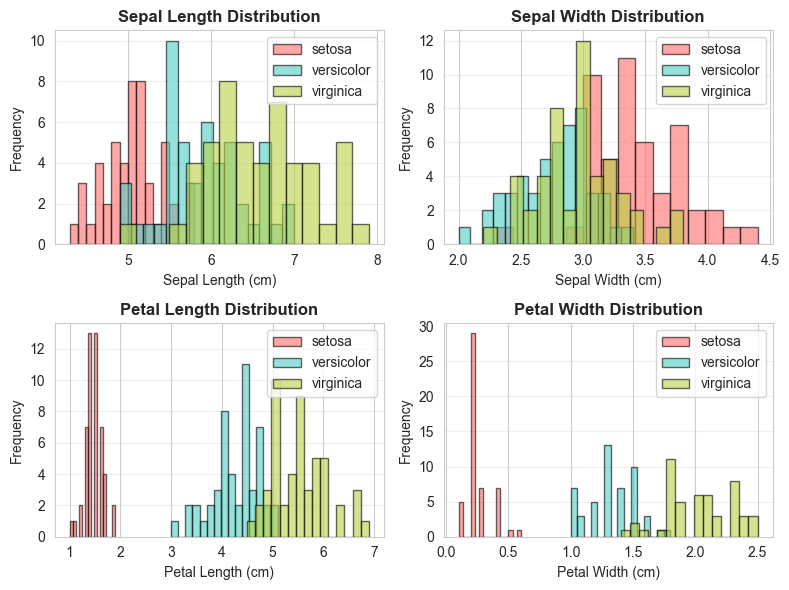

In [18]:
# Feature distributions by species
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
colors = ['#FF6B6B', '#4ECDC4', "#BAD145"]

for idx, feature in enumerate(features):
    ax = axes[idx // 2, idx % 2]
    
    for species, color in zip(df_iris['species'].unique(), colors):
        data = df_iris[df_iris['species'] == species][feature]
        ax.hist(data, bins=15, alpha=0.6, label=species, color=color, edgecolor='black')
    
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution', fontweight='bold')
    ax.set_xlabel(f'{feature.replace("_", " ").title()} (cm)')
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

### Correlation Analysis

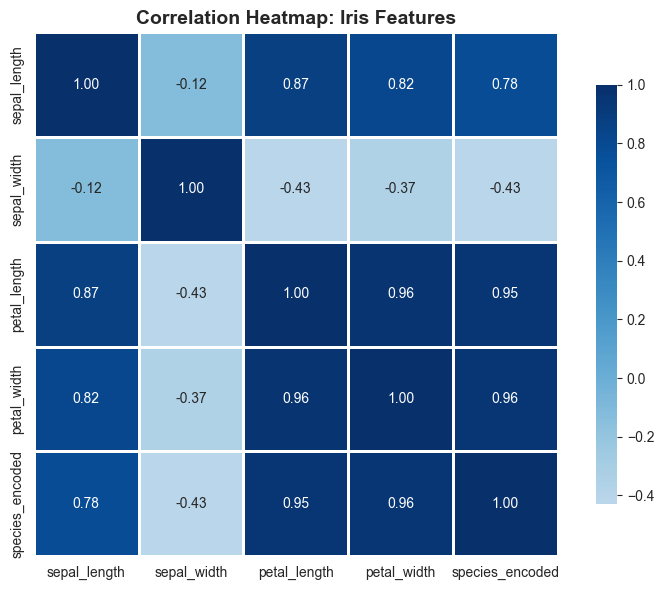

In [19]:
# Correlation matrix
numeric_features = df_iris.select_dtypes(include=[np.number]).columns
corr_matrix = df_iris[numeric_features].corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap=sns.color_palette("Blues", 30, as_cmap=True), center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Heatmap: Iris Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Pairwise Relationships: Scatter Plots

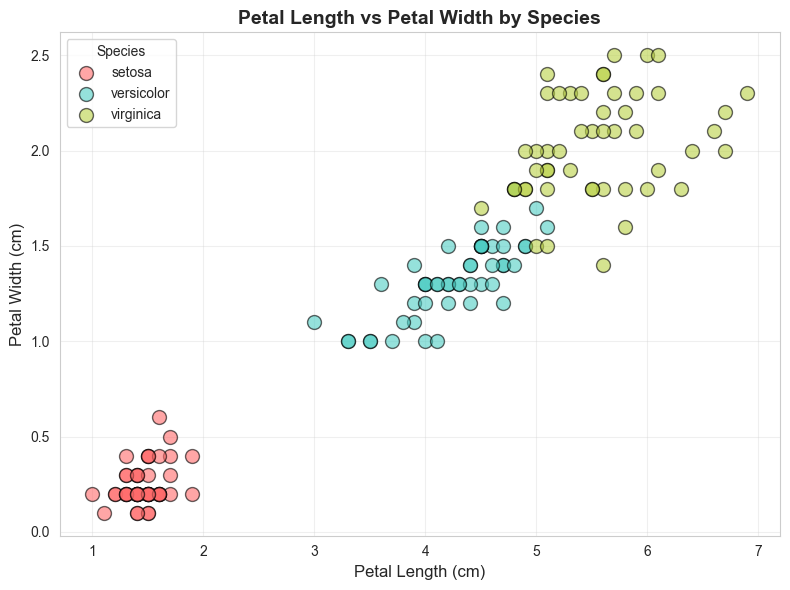

In [20]:
# Scatter plot: Petal Length vs Petal Width
fig, ax = plt.subplots(figsize=(8, 6))

colors_map = {'setosa': '#FF6B6B', 'versicolor': '#4ECDC4', 'virginica': "#BAD145"}
for species in df_iris['species'].unique():
    data = df_iris[df_iris['species'] == species]
    ax.scatter(data['petal_length'], data['petal_width'], 
               label=species, alpha=0.6, s=100, 
               color=colors_map[species], edgecolor='black')

ax.set_xlabel('Petal Length (cm)', fontsize=12)
ax.set_ylabel('Petal Width (cm)', fontsize=12)
ax.set_title('Petal Length vs Petal Width by Species', fontsize=14, fontweight='bold')
ax.legend(title='Species')
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

---

# Part 2: Titanic Dataset EDA

The Titanic dataset contains passenger information from the famous 1912 disaster. We'll explore survival patterns and demographic data.

![alt text](image.png)

Features:

- **survived**: 0 = no, 1 = yes

- **pclass**: passenger class (1st, 2nd, 3rd)

- **sex**: male/female

- **age**: age in years (has missing values)

- **sibsp**: number of siblings/spouses aboard

- **parch**: number of parents/children aboard

- **fare**: ticket fare paid

- **embarked**: port of embarkation (typically C = Cherbourg, Q = Queenstown, S = Southampton; may have missing)

- **class**: same info as pclass but as a categorical label (First/Second/Third)

- **who**: group label (man/woman/child) derived from age/sex

- **adult_male**: boolean indicator for adult male passengers

- **deck**: cabin deck letter (A–G; many missing)

- **embark_town**: full town name corresponding to embarked

- **alive**: "yes"/"no" version of survived

- **alone**: boolean indicating whether the passenger traveled without family (sibsp+parch == 0)

## 1. Read in data

In [21]:
# Load the Titanic dataset from seaborn's built-in datasets
titanic = sns.load_dataset('titanic')
print(f"Data loaded: {titanic.shape[0]} rows, {titanic.shape[1]} columns")

Data loaded: 891 rows, 15 columns


## 2. Figure out what it is

In [22]:
# First look
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
# Column information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## 3. Pre-process it

For this tutorial, we'll keep the raw data as-is. In practice, you might create a copy for preprocessing.

In [24]:
# Create working copy
df_titanic = titanic.copy()

## 4. Look at dimensions

In [25]:
print(f"Dataset shape: {df_titanic.shape}")
print(f"Total passengers: {df_titanic.shape[0]}")
print(f"Total features: {df_titanic.shape[1]}")
print(f"\nMemory usage: {df_titanic.memory_usage(deep=True).sum() / 1024:.2f} KB")

Dataset shape: (891, 15)
Total passengers: 891
Total features: 15

Memory usage: 313.72 KB


## 5. Look at values

In [26]:
# Statistical summary for numeric columns
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [27]:
# Summary for categorical columns
df_titanic.describe(include=['object', 'category'])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


### Distribution of Numeric Features

Visualize the distribution of key numeric features in the Titanic dataset.

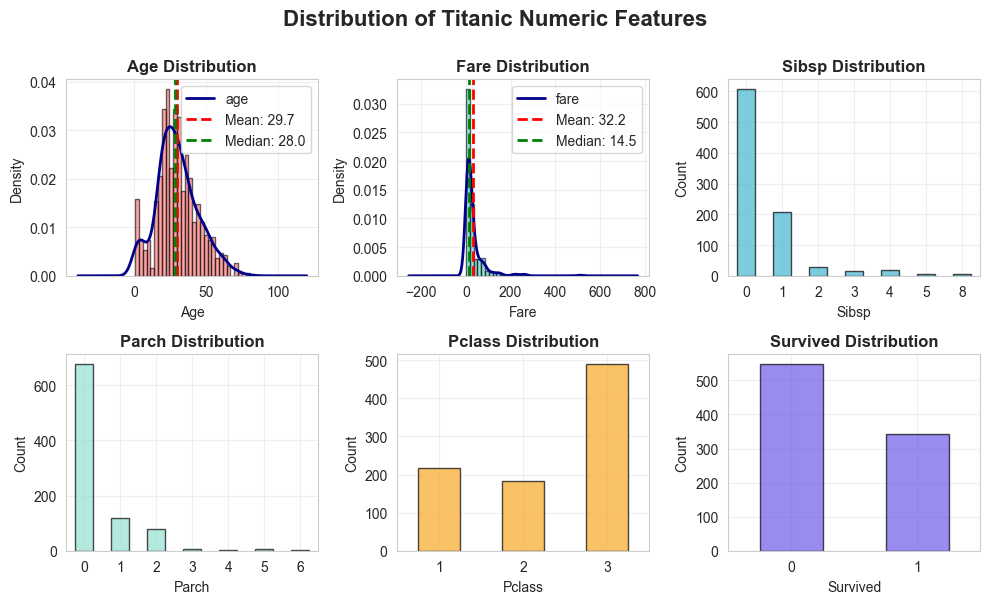

DISTRIBUTION STATISTICS (Continuous Variables):

AGE:
  Mean: 29.70
  Median: 28.00
  Std Dev: 14.53
  Skewness: 0.39
  Kurtosis: 0.18
  Missing: 177 (19.9%)

FARE:
  Mean: 32.20
  Median: 14.45
  Std Dev: 49.69
  Skewness: 4.79
  Kurtosis: 33.40
  Missing: 0 (0.0%)


In [28]:
# Distribution plots for Titanic numeric features
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
numeric_features = ['age', 'fare', 'sibsp', 'parch', 'pclass', 'survived']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#95E1D3', '#F9A826', '#6C5CE7']

for idx, (col, color) in enumerate(zip(numeric_features, colors)):
    ax = axes[idx // 3, idx % 3]
    
    # Remove NaN for plotting
    data = df_titanic[col].dropna()
    
    # Histogram with KDE (only for continuous variables)
    if col in ['age', 'fare']:
        data.hist(bins=30, ax=ax, alpha=0.6, color=color, edgecolor='black', density=True)
        data.plot(kind='kde', ax=ax, color='darkblue', linewidth=2)
        
        # Add mean and median lines
        mean_val = data.mean()
        median_val = data.median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    else:
        # Bar chart for discrete variables
        data.value_counts().sort_index().plot(kind='bar', ax=ax, color=color, alpha=0.7, edgecolor='black')
        ax.set_ylabel('Count')
    
    ax.set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold', fontsize=12)
    ax.set_xlabel(col.replace("_", " ").title())
    
    if col in ['age', 'fare']:
        ax.set_ylabel('Density')
        ax.legend(loc='upper right')
    
    ax.grid(alpha=0.3)
    if col not in ['age', 'fare']:
        ax.tick_params(axis='x', rotation=0)

plt.suptitle('Distribution of Titanic Numeric Features', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

# Print distribution statistics for continuous variables
print("DISTRIBUTION STATISTICS (Continuous Variables):")
print("=" * 70)
for col in ['age', 'fare']:
    data = df_titanic[col].dropna()
    print(f"\n{col.upper()}:")
    print(f"  Mean: {data.mean():.2f}")
    print(f"  Median: {data.median():.2f}")
    print(f"  Std Dev: {data.std():.2f}")
    print(f"  Skewness: {data.skew():.2f}")
    print(f"  Kurtosis: {data.kurtosis():.2f}")
    print(f"  Missing: {df_titanic[col].isnull().sum()} ({df_titanic[col].isnull().sum()/len(df_titanic)*100:.1f}%)")

## 6. Hunt for messed up values

In [29]:
# Check for unusual values in numeric columns
print("Age statistics:")
print(df_titanic['age'].describe())
print(f"\nAny negative ages? {(df_titanic['age'] < 0).any()}")
print(f"Any ages > 100? {(df_titanic['age'] > 100).any()}")

Age statistics:
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

Any negative ages? False
Any ages > 100? False


In [30]:
# Check fare values
print("Fare statistics:")
print(df_titanic['fare'].describe())
print(f"\nZero fares: {(df_titanic['fare'] == 0).sum()}")
print(f"Maximum fare: ${df_titanic['fare'].max():.2f}")

Fare statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Zero fares: 15
Maximum fare: $512.33


In [31]:

# 1) how many duplicated rows (excluding first occurrence)
print(f"Duplicate rows: {df_titanic.duplicated().sum()}")

Duplicate rows: 107


In [32]:
# 1) filter to only duplicated rows (keep all copies)
df_count_dp = df_titanic.drop(columns=['class', 'embark_town', 'alive', 'who']) 
dups_only = df_count_dp[df_count_dp.duplicated(keep=False)]

# 2) collapse to 1 row per duplicate + count
dup_summary = (
    dups_only
    .value_counts(dropna=False)
    .reset_index(name="count")
    .sort_values("count", ascending=False)
)

dup_summary.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,deck,alone,count
0,0,3,male,NaN,0,0,7.8958,S,True,NaN,True,13
1,0,3,male,NaN,0,0,8.0500,S,True,NaN,True,12
2,0,3,male,NaN,0,0,7.7500,Q,True,NaN,True,8
3,1,3,female,NaN,0,0,7.7500,Q,False,NaN,True,7
4,0,2,male,NaN,0,0,0.0000,S,True,NaN,True,6
5,0,3,male,NaN,0,0,7.2250,C,True,NaN,True,5
6,0,3,male,NaN,0,0,7.2292,C,True,NaN,True,5
7,0,3,male,NaN,8,2,69.5500,S,True,NaN,False,4
8,0,3,male,19.0,0,0,7.8958,S,True,NaN,True,3
9,0,2,male,25.0,0,0,13.0000,S,True,NaN,True,3


## 7. Hunt for NAs

Missing data is critical to understand. The Titanic dataset has interesting patterns in **Age** and **Cabin**.

In [33]:
# Missing values summary
missing = pd.DataFrame({
    'Missing_Count': df_titanic.isnull().sum(),
    'Missing_Percent': (df_titanic.isnull().sum() / len(df_titanic) * 100).round(2)
}).sort_values('Missing_Count', ascending=False)

print("Missing Data Summary:")
print(missing[missing['Missing_Count'] > 0])

Missing Data Summary:
             Missing_Count  Missing_Percent
deck                   688            77.22
age                    177            19.87
embarked                 2             0.22
embark_town              2             0.22


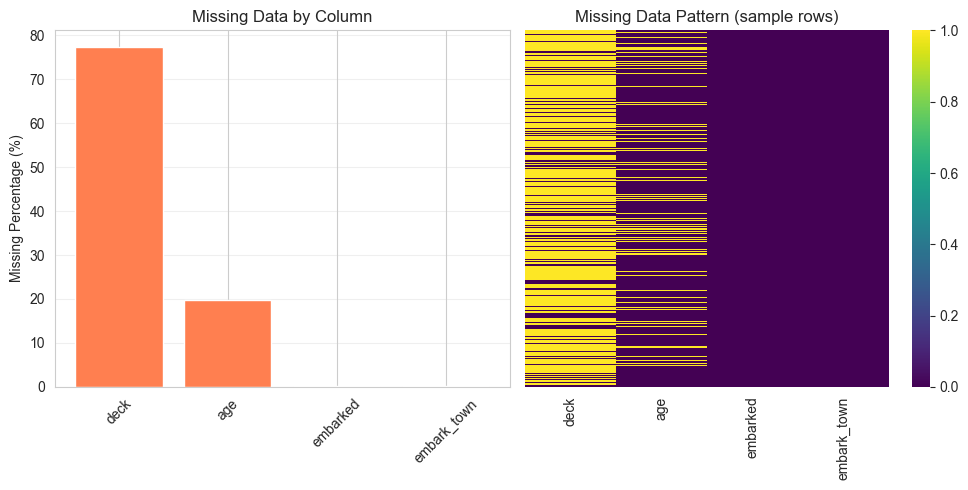

In [34]:
# Visualize missing data patterns
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Missing data bar chart
missing_viz = missing[missing['Missing_Count'] > 0]
axes[0].bar(missing_viz.index, missing_viz['Missing_Percent'], color='coral')
axes[0].set_ylabel('Missing Percentage (%)')
axes[0].set_title('Missing Data by Column')
axes[0].grid(axis='y', alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Missing data heatmap - only use columns that actually have missing data
cols_with_missing = missing[missing['Missing_Count'] > 0].index.tolist()[:4]  # Top 4 columns with missing data
if cols_with_missing:
    sns.heatmap(df_titanic[cols_with_missing].isnull(), 
                cbar=True, yticklabels=False, cmap='viridis', ax=axes[1])
    axes[1].set_title('Missing Data Pattern (sample rows)')
else:
    axes[1].text(0.5, 0.5, 'No missing data!', ha='center', va='center', fontsize=14)
    axes[1].set_title('Missing Data Pattern')

plt.tight_layout()
plt.show()

**Key Observations:**
- **Age**: ~20% missing 
- **Cabin**: ~77% missing 
- **Embarked**: Only 2 missing

## 8. Plot it

### Survival vs Demographics

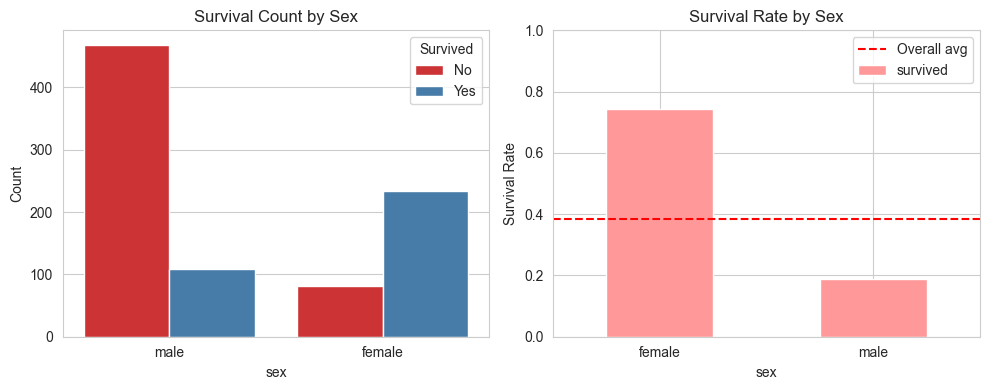

Survival rates by sex:
sex
female    74.20%
male      18.89%
Name: survived, dtype: object


In [35]:
# Survival rate by sex
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Count plot
sns.countplot(data=df_titanic, x='sex', hue='survived', ax=axes[0], palette='Set1')
axes[0].set_title('Survival Count by Sex')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Survival rate
survival_by_sex = df_titanic.groupby('sex')['survived'].mean()
survival_by_sex.plot(kind='bar', ax=axes[1], color=['#ff9999'])
axes[1].set_title('Survival Rate by Sex')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].axhline(df_titanic['survived'].mean(), color='red', linestyle='--', label='Overall avg')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Survival rates by sex:")
print(survival_by_sex.apply(lambda x: f"{x:.2%}"))

### Survival by Passenger Class

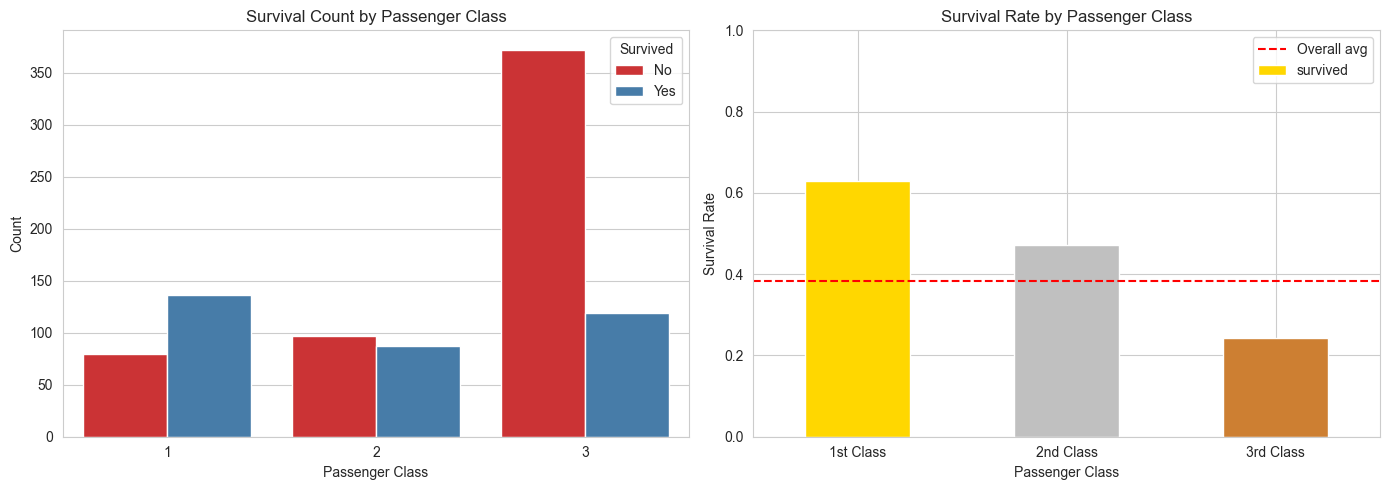

Survival rates by class:
pclass
1    62.96%
2    47.28%
3    24.24%
Name: survived, dtype: object


In [36]:
# Survival rate by passenger class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df_titanic, x='pclass', hue='survived', ax=axes[0], palette='Set1')
axes[0].set_title('Survival Count by Passenger Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')
axes[0].legend(title='Survived', labels=['No', 'Yes'])

# Survival rate
survival_by_class = df_titanic.groupby('pclass')['survived'].mean()
survival_by_class.plot(kind='bar', ax=axes[1], color=['gold', 'silver', '#cd7f32'])
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate')
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[1].axhline(df_titanic['survived'].mean(), color='red', linestyle='--', label='Overall avg')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Survival rates by class:")
print(survival_by_class.apply(lambda x: f"{x:.2%}"))

### Age Distribution and Survival

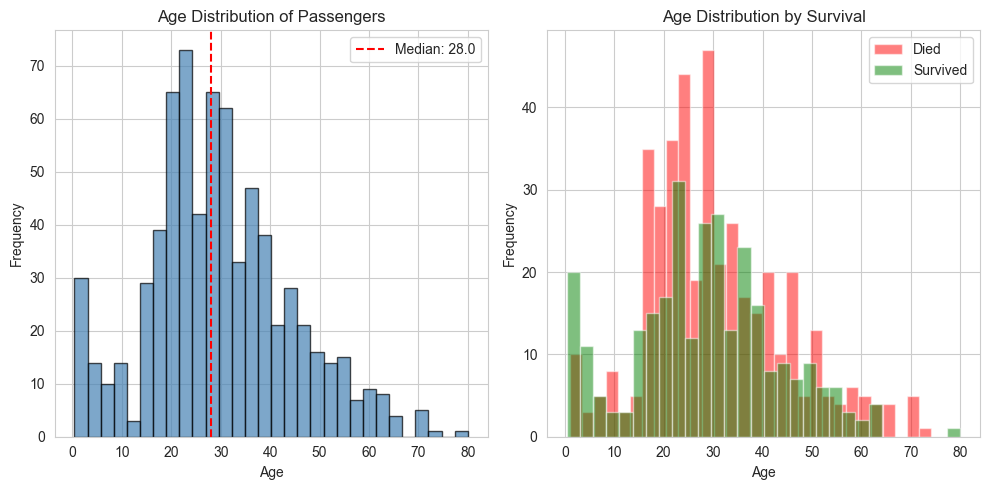

In [37]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Overall age distribution
df_titanic['age'].hist(bins=30, ax=axes[0], color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Age Distribution of Passengers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df_titanic['age'].median(), color='red', linestyle='--', label=f"Median: {df_titanic['age'].median():.1f}")
axes[0].legend()

# Age distribution by survival
df_titanic[df_titanic['survived'] == 0]['age'].hist(bins=30, alpha=0.5, label='Died', ax=axes[1], color='red')
df_titanic[df_titanic['survived'] == 1]['age'].hist(bins=30, alpha=0.5, label='Survived', ax=axes[1], color='green')
axes[1].set_title('Age Distribution by Survival')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()

### Survival Heatmap

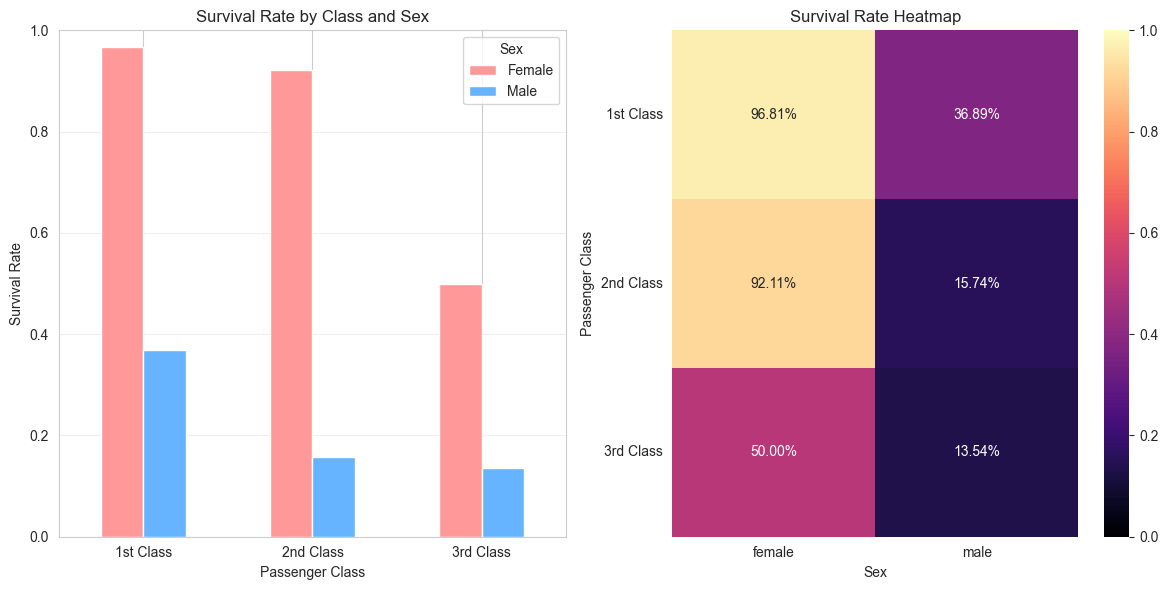

In [ ]:
# Survival rate by sex and class
survival_rate = df_titanic.groupby(['pclass', 'sex'])['survived'].mean().unstack()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grouped bar chart
survival_rate.plot(kind='bar', ax=axes[0], color=["#FF0000", "#0072e5"])
axes[0].set_title('Survival Rate by Class and Sex')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Passenger Class')
axes[0].set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
axes[0].set_ylim(0, 1)
axes[0].legend(title='Sex', labels=['Female', 'Male'])
axes[0].grid(axis='y', alpha=0.3)

# Heatmap
sns.heatmap(survival_rate, annot=True, fmt='.2%', cmap='magma', ax=axes[1], vmin=0, vmax=1)
axes[1].set_title('Survival Rate Heatmap')
axes[1].set_xlabel('Sex')
axes[1].set_ylabel('Passenger Class')
axes[1].set_yticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)

plt.tight_layout()
plt.show()